In [1]:
import os
import networkx as nx
import numpy as np
import pandas as pd
import math
import pyflagser

import statistics
import sys
import pickle
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

In [2]:
import pandas as pd

df_data = pd.read_csv('Feature_SanMulti.csv')

df_data.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,147,148,149,150,151,152,153,154,155,Class
0,0,1001,1001,1001,1001,1001,1001,1001,1001,1001,...,4609,4609,4609,4609,4609,4609,4609,4609,4609,0
1,1,983,970,954,934,909,891,976,1240,1386,...,4512,4470,4430,4265,3589,2590,2158,837,839,0
2,2,983,970,954,934,909,891,976,1240,1386,...,4512,4470,4430,4265,3589,2590,2158,837,839,0
3,3,983,970,954,934,909,891,976,1240,1386,...,4512,4470,4430,4265,3589,2590,2158,837,839,0
4,4,983,970,954,934,909,891,976,1240,1386,...,4512,4470,4430,4265,3589,2590,2158,837,839,0
5,5,983,970,954,934,909,891,976,1240,1386,...,4512,4470,4430,4265,3589,2590,2158,837,839,0
6,6,965,952,937,917,896,895,1052,1304,1406,...,4485,4450,4393,4114,3331,2417,2015,838,839,1
7,7,928,913,898,876,866,903,1103,1300,1397,...,4462,4430,4349,3889,3125,2273,1885,853,839,1
8,8,976,958,939,925,902,891,1018,1273,1394,...,4496,4461,4419,4177,3464,2487,2071,840,839,1
9,9,983,970,954,934,909,891,976,1240,1386,...,4512,4470,4430,4265,3589,2590,2158,837,839,0


In [3]:
Class=df_data['Class'].to_numpy()

In [4]:
data_array=df_data.drop(['Unnamed: 0', 'Class'], axis=1)
data_array.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,...,4609,4609,4609,4609,4609,4609,4609,4609,4609,4609
1,983,970,954,934,909,891,976,1240,1386,1411,...,4537,4512,4470,4430,4265,3589,2590,2158,837,839
2,983,970,954,934,909,891,976,1240,1386,1411,...,4537,4512,4470,4430,4265,3589,2590,2158,837,839
3,983,970,954,934,909,891,976,1240,1386,1411,...,4537,4512,4470,4430,4265,3589,2590,2158,837,839
4,983,970,954,934,909,891,976,1240,1386,1411,...,4537,4512,4470,4430,4265,3589,2590,2158,837,839


In [5]:
topo_volt_branch=np.array(data_array)


In [7]:
import time
start = time.time()
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

feature=[]
for i in range(156):
    feature.append("{}".format(i))


X=data_array[feature] # Features
y=df_data['Class']  # Labels
#y=data["Class"].astype("category")
#print(X)
print("XGBoost\n******************")
bst = XGBClassifier(n_estimators=300, max_depth=3, learning_rate=0.1)
scores = cross_val_score(bst, X, y, cv=10)
print("%0.3f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()))


svc = SVC(kernel='linear', C=1.0)
# Cross-validation
print("SVM\n****************")
scores_svc = cross_val_score(svc, X, y, cv=10)
print("%0.3f accuracy with a standard deviation of %0.2f" % (scores_svc.mean()*100, scores_svc.std()))


bg = BaggingClassifier(n_estimators=300)
print("BC\n****************")
scores_bg = cross_val_score(bg, X, y, cv=10)
print("%0.3f accuracy with a standard deviation of %0.2f" % (scores_bg.mean()*100, scores_bg.std()))

print("end\n****************")
end = time.time()
print("The time of execution of above program is :", (end-start), "S")

XGBoost
******************
99.333 accuracy with a standard deviation of 0.01
SVM
****************
99.667 accuracy with a standard deviation of 0.01
BC
****************
98.667 accuracy with a standard deviation of 0.02
end
****************
The time of execution of above program is : 5.457574844360352 S


Multi PH using voltage and Branch Flow information
 ******************



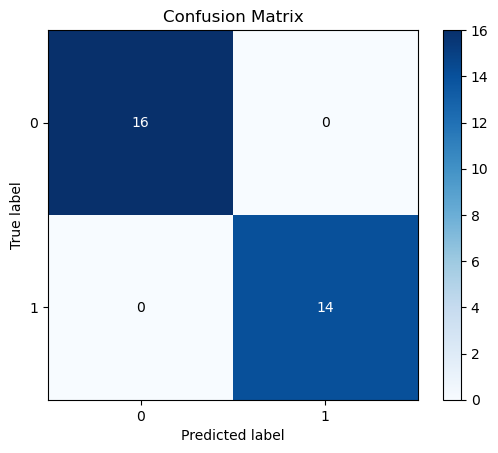

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



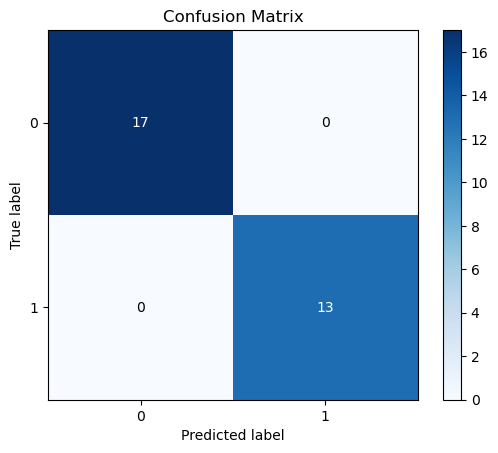

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



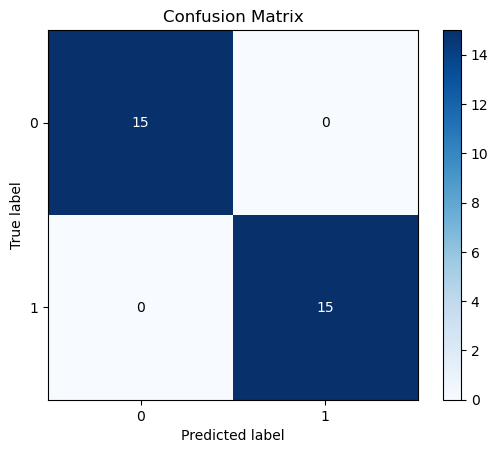

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



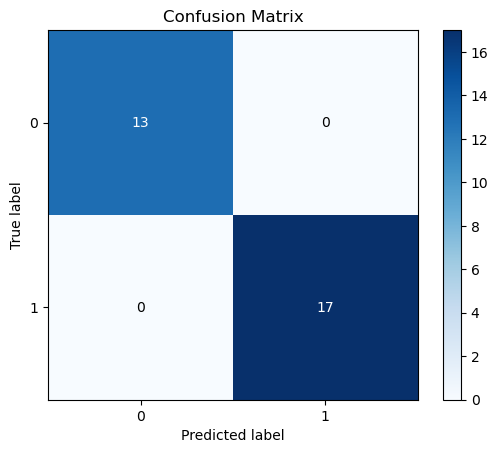

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



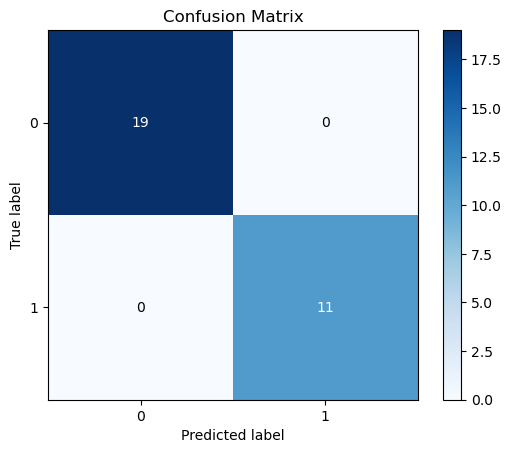

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



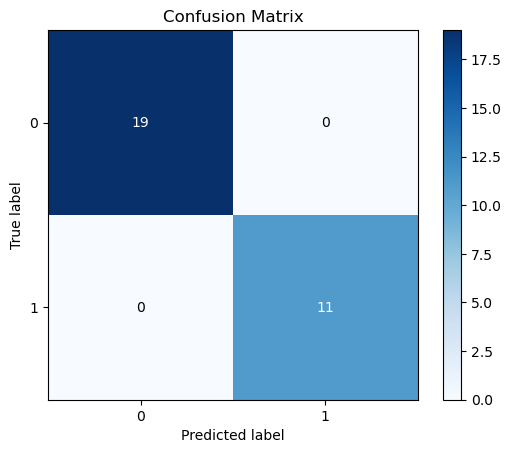

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



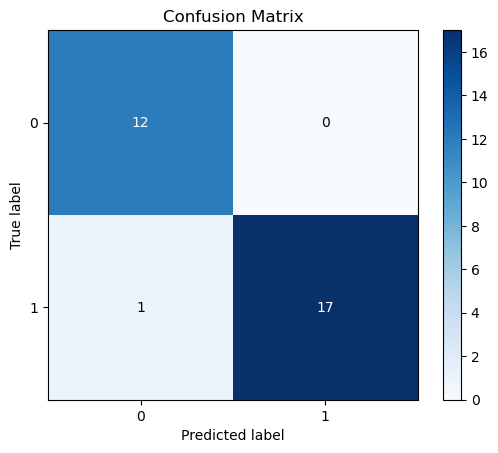

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.94      0.97        18

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



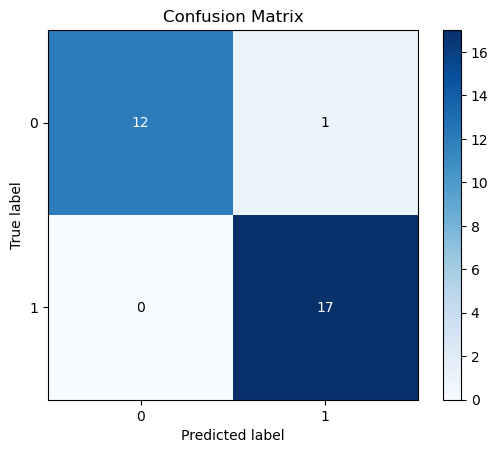

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.94      1.00      0.97        17

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



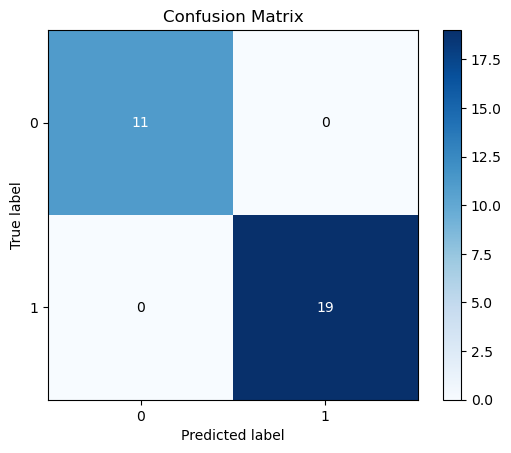

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        19

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



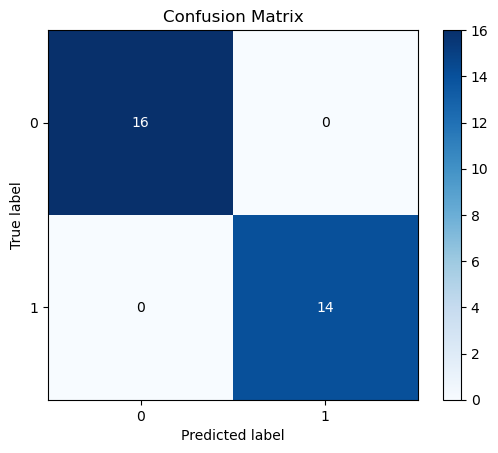

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Mean Presision: 0.9923076923076923
Std  0.02432521277052598
****************
Mean recall: 0.9923076923076923
Std  0.02432521277052598
****************
Mean f1: 0.992
Std  0.016865480854231327


In [6]:
print("Multi PH using voltage and Branch Flow information\n ******************\n")
X=topo_volt_branch
y=np.array(Class)


# Define the K-fold Cross Validator
num_folds=10
kfold = KFold(n_splits=num_folds, shuffle=True)

acc_per_fold=[]
precision_per_flod=[]
recall_per_fold=[]
f1_per_fold=[]
fold_no = 1
for train, test in kfold.split(X, y):
    bst = XGBClassifier(n_estimators=200, max_depth=30, learning_rate=0.1,booster='gbtree')

    # Train the model
    bst.fit(X[train], y[train])
    # Evaluate the model
    y_pred=bst.predict(X[test])
    #Import scikit-learn metrics module for accuracy calculation
    
    skplt.metrics.plot_confusion_matrix(y[test], y_pred)
    #skplt.metrics.plot_roc(y_test, predicted_probas)
    #skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
    plt.show()
    print(classification_report(y[test], y_pred))
    precision=precision_score(y[test], y_pred, average=None)
    precision_per_flod.append(precision[0])
    f1score=f1_score(y[test], y_pred, average=None)
    f1_per_fold.append(f1score[0])
    recall=recall_score(y[test], y_pred, average=None)
    recall_per_fold.append(recall[0])
    #print(precision)
    # Model Accuracy, how often is the classifier correct?
    acc=metrics.accuracy_score(y[test], y_pred)*100
    #print("Accuracy:",acc,"%")
    acc_per_fold.append(acc)

      # Increase fold number
    fold_no = fold_no + 1

mean_pre = statistics.mean(precision_per_flod)
std_pre = statistics.stdev(precision_per_flod)
print("Mean Presision:", mean_pre)
print("Std ", std_pre)
print('****************')
mean_recall = statistics.mean(recall_per_fold)
std_recall = statistics.stdev(recall_per_fold)
print("Mean recall:", mean_recall)
print("Std ", std_recall)
print('****************')
mean_f1 = statistics.mean(f1_per_fold)
std_f1 = statistics.stdev(f1_per_fold)
print("Mean f1:", mean_f1)
print("Std ", std_f1)

In [8]:
import pandas as pd

df_data = pd.read_csv('Feature_SanVoltage.csv')

df_data.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,Class
0,0,1001,1016,1019,1019,1019,1019,1019,1019,1019,1019,1019,4594,4609,0
1,1,1016,1017,1019,1019,1019,1019,1019,1019,1019,1019,1019,4594,4609,0
2,2,1016,1017,1019,1019,1019,1019,1019,1019,1019,1019,1019,4594,4609,0
3,3,1016,1017,1019,1019,1019,1019,1019,1019,1019,1019,1019,4594,4609,0
4,4,1016,1017,1019,1019,1019,1019,1019,1019,1019,1019,1019,4594,4609,0
5,5,1016,1017,1019,1019,1019,1019,1019,1019,1019,1019,1019,4594,4609,0
6,6,1016,1017,1019,1019,1019,1019,1019,1019,1019,1019,1019,4593,4609,1
7,7,990,1000,1002,1002,1002,1002,1002,1002,1002,1002,1002,4574,4609,1
8,8,1016,1017,1019,1019,1019,1019,1019,1019,1019,1019,1019,4592,4609,1
9,9,1016,1017,1019,1019,1019,1019,1019,1019,1019,1019,1019,4594,4609,0


In [9]:
data_array=df_data.drop(['Unnamed: 0', 'Class'], axis=1)
data_array.head()
topo_volt=np.array(data_array)

In [10]:
print("Single PH using voltage information\n ******************\n")
X=topo_volt
y=np.array(Class)


# Define the K-fold Cross Validator
num_folds=10
kfold = KFold(n_splits=num_folds, shuffle=True)

acc_per_fold=[]
precision_per_flod=[]
recall_per_fold=[]
f1_per_fold=[]
fold_no = 1
for train, test in kfold.split(X, y):
    bst = XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.1,booster='gbtree')

    # Train the model
    bst.fit(X[train], y[train])
    # Evaluate the model
    y_pred=bst.predict(X[test])
    #Import scikit-learn metrics module for accuracy calculation
    
    #skplt.metrics.plot_confusion_matrix(y[test], y_pred)
    #skplt.metrics.plot_roc(y_test, predicted_probas)
    #skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
    #plt.show()
    #print(classification_report(y[test], y_pred))
    precision=precision_score(y[test], y_pred, average=None)
    precision_per_flod.append(precision[0])
    f1score=f1_score(y[test], y_pred, average=None)
    f1_per_fold.append(f1score[0])
    recall=recall_score(y[test], y_pred, average=None)
    recall_per_fold.append(recall[0])
    #print(precision)
    # Model Accuracy, how often is the classifier correct?
    acc=metrics.accuracy_score(y[test], y_pred)*100
    #print("Accuracy:",acc,"%")
    acc_per_fold.append(acc)

      # Increase fold number
    fold_no = fold_no + 1

mean_pre = statistics.mean(precision_per_flod)
std_pre = statistics.stdev(precision_per_flod)
print("Mean Presision:", mean_pre)
print("Std ", std_pre)
print('****************')
mean_recall = statistics.mean(recall_per_fold)
std_recall = statistics.stdev(recall_per_fold)
print("Mean recall:", mean_recall)
print("Std ",std_recall)
print('****************')
mean_f1 = statistics.mean(f1_per_fold)
std_f1 = statistics.stdev(f1_per_fold)
print("Mean f1:", mean_f1)
print("Std ", std_f1)

Single PH using voltage information
 ******************

Mean Presision: 0.9448068701164676
Std  0.0505100126515806
****************
Mean recall: 0.9928571428571429
Std  0.02258769757263127
****************
Mean f1: 0.967542673852324
Std  0.030436532386607394


In [11]:
import pandas as pd

df_data = pd.read_csv('Feature_SanBFlow.csv')

df_data.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,Class
0,0,2,2,2,2,2,2,2,2,2,2,2,2,0
1,1,27,37,53,74,99,127,316,796,1255,1348,956,967,0
2,2,27,37,53,74,99,127,316,796,1255,1348,956,967,0
3,3,27,37,53,74,99,127,316,796,1255,1348,956,967,0
4,4,27,37,53,74,99,127,316,796,1255,1348,956,967,0
5,5,27,37,53,74,99,127,316,796,1255,1348,956,967,0
6,6,40,54,72,92,116,163,457,935,1313,1331,956,967,1
7,7,54,70,86,108,127,229,588,1028,1339,1323,954,967,1
8,8,34,46,66,84,110,141,397,871,1285,1342,957,967,1
9,9,27,37,53,74,99,127,316,796,1255,1348,956,967,0


In [12]:
data_array=df_data.drop(['Unnamed: 0', 'Class'], axis=1)
data_array.head()
topo_branch=np.array(data_array)

In [13]:
print("Single PH using Branch Flow information\n ******************\n")
X=topo_branch
y=np.array(Class)


# Define the K-fold Cross Validator
num_folds=10
kfold = KFold(n_splits=num_folds, shuffle=True)

acc_per_fold=[]
precision_per_flod=[]
recall_per_fold=[]
f1_per_fold=[]
fold_no = 1
for train, test in kfold.split(X, y):
    bst = XGBClassifier(n_estimators=200, max_depth=30, learning_rate=0.1,booster='gbtree')

    # Train the model
    bst.fit(X[train], y[train])
    # Evaluate the model
    y_pred=bst.predict(X[test])
    #Import scikit-learn metrics module for accuracy calculation
    
    #skplt.metrics.plot_confusion_matrix(y[test], y_pred)
    #skplt.metrics.plot_roc(y_test, predicted_probas)
    #skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
    #plt.show()
    #print(classification_report(y[test], y_pred))
    precision=precision_score(y[test], y_pred, average=None)
    precision_per_flod.append(precision[0])
    f1score=f1_score(y[test], y_pred, average=None)
    f1_per_fold.append(f1score[0])
    recall=recall_score(y[test], y_pred, average=None)
    recall_per_fold.append(recall[0])
    #print(precision)
    # Model Accuracy, how often is the classifier correct?
    acc=metrics.accuracy_score(y[test], y_pred)*100
    #print("Accuracy:",acc,"%")
    acc_per_fold.append(acc)

      # Increase fold number
    fold_no = fold_no + 1

mean_pre = statistics.mean(precision_per_flod)
std_pre = statistics.stdev(precision_per_flod)
print("Mean Presision:", mean_pre)
print("Std ", std_pre)
print('****************')
mean_recall = statistics.mean(recall_per_fold)
std_recall = statistics.stdev(recall_per_fold)
print("Mean recall:", mean_recall)
print("Std ", std_recall)
print('****************')
mean_f1 = statistics.mean(f1_per_fold)
std_f1 = statistics.stdev(f1_per_fold)
print("Mean f1:", mean_f1)
print("Std ", std_f1)

Single PH using Branch Flow information
 ******************

Mean Presision: 0.9758333333333333
Std  0.0314760343871451
****************
Mean recall: 0.990909090909091
Std  0.02874797872880346
****************
Mean f1: 0.9827741039086979
Std  0.018938341548097967


In [ ]:
df_data = pd.read_csv('Feature_multi_8500.csv')

df_data.head(10)


In [ ]:
Class=df_data['Class'].to_numpy()
data_array=df_data.drop(['Unnamed: 0', 'Class'], axis=1)
data_array.head()

In [ ]:
topo_volt_branch=np.array(data_array)

Multi PH using voltage and Branch Flow information
 ******************



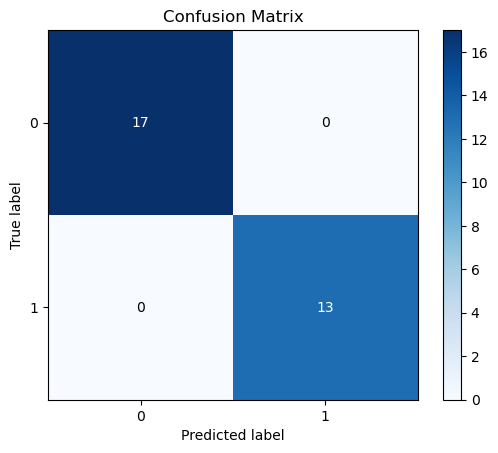

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



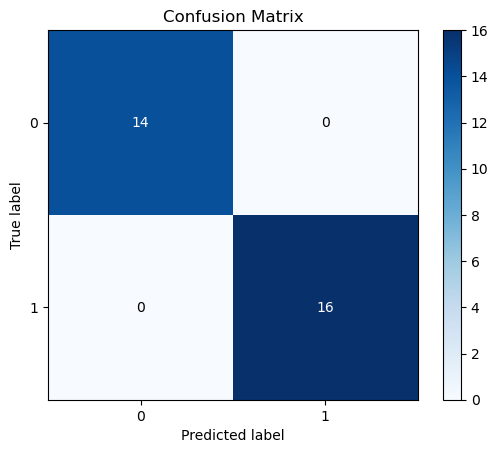

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



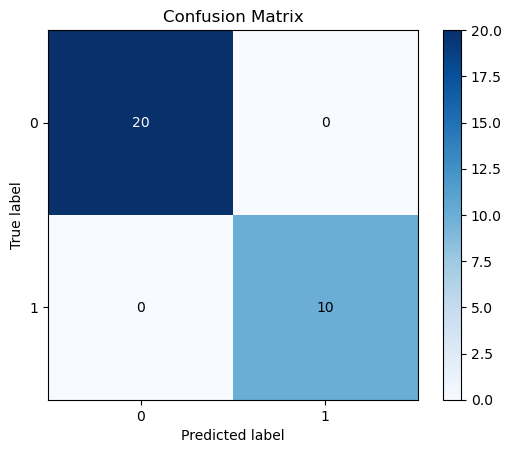

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



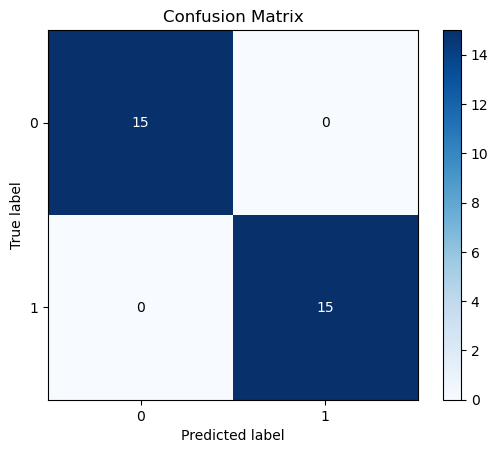

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



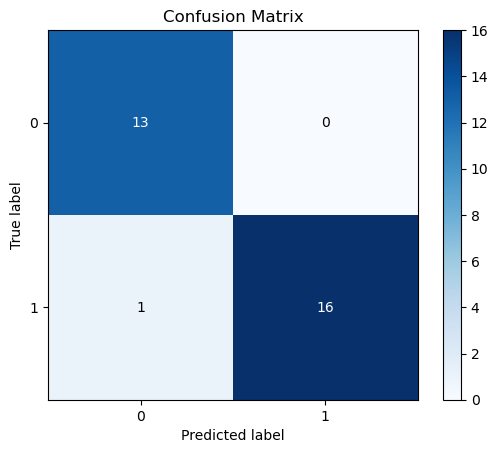

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.94      0.97        17

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



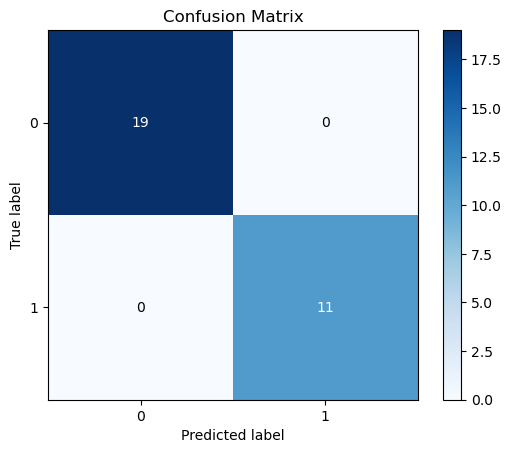

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



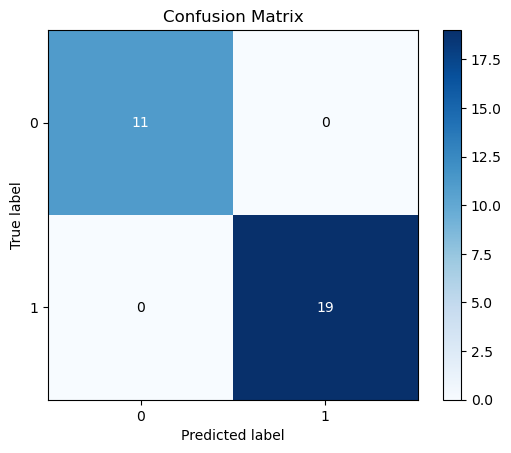

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        19

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



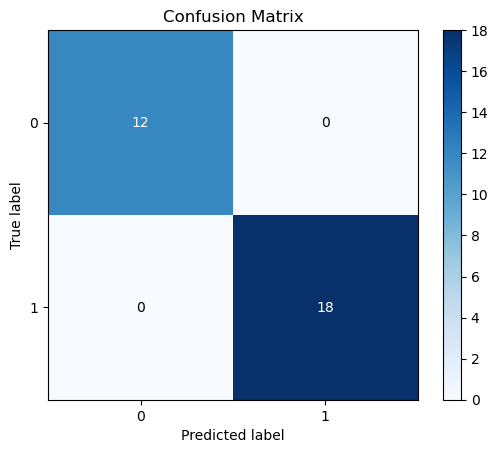

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        18

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



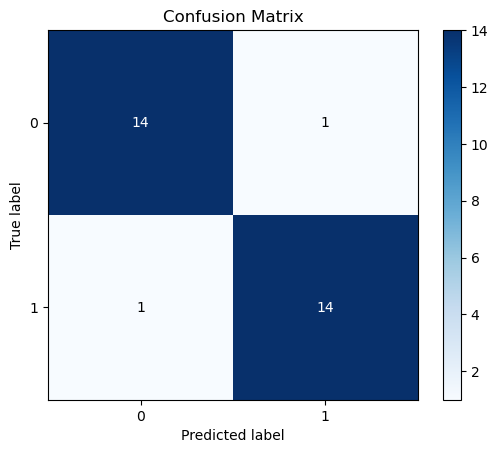

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



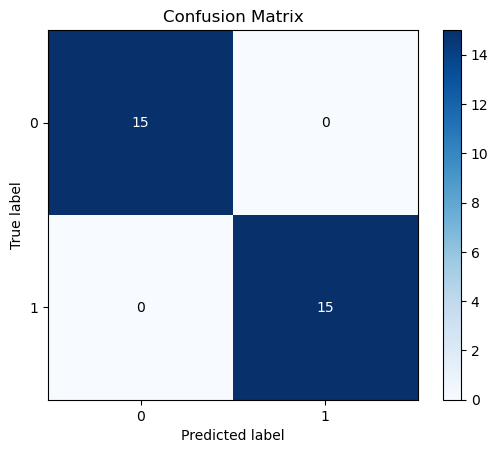

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Mean Presision: 0.9861904761904762
Std  0.029134660119126
****************
Mean recall: 0.9933333333333333
Std  0.02108185106778919
****************
Mean f1: 0.9896296296296296
Std  0.02295101242196987


In [7]:
print("Multi PH using voltage and Branch Flow information\n ******************\n")
X=topo_volt_branch
y=np.array(Class)


# Define the K-fold Cross Validator
num_folds=10
kfold = KFold(n_splits=num_folds, shuffle=True)

acc_per_fold=[]
precision_per_flod=[]
recall_per_fold=[]
f1_per_fold=[]
fold_no = 1
for train, test in kfold.split(X, y):
    bst = XGBClassifier(n_estimators=200, max_depth=30, learning_rate=0.1,booster='gbtree')

    # Train the model
    bst.fit(X[train], y[train])
    # Evaluate the model
    y_pred=bst.predict(X[test])
    #Import scikit-learn metrics module for accuracy calculation
    
    skplt.metrics.plot_confusion_matrix(y[test], y_pred)
    #skplt.metrics.plot_roc(y_test, predicted_probas)
    #skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
    plt.show()
    print(classification_report(y[test], y_pred))
    precision=precision_score(y[test], y_pred, average=None)
    precision_per_flod.append(precision[0])
    f1score=f1_score(y[test], y_pred, average=None)
    f1_per_fold.append(f1score[0])
    recall=recall_score(y[test], y_pred, average=None)
    recall_per_fold.append(recall[0])
    #print(precision)
    # Model Accuracy, how often is the classifier correct?
    acc=metrics.accuracy_score(y[test], y_pred)*100
    #print("Accuracy:",acc,"%")
    acc_per_fold.append(acc)

      # Increase fold number
    fold_no = fold_no + 1

mean_pre = statistics.mean(precision_per_flod)
std_pre = statistics.stdev(precision_per_flod)
print("Mean Presision:", mean_pre)
print("Std ", std_pre)
print('****************')
mean_recall = statistics.mean(recall_per_fold)
std_recall = statistics.stdev(recall_per_fold)
print("Mean recall:", mean_recall)
print("Std ", std_recall)
print('****************')
mean_f1 = statistics.mean(f1_per_fold)
std_f1 = statistics.stdev(f1_per_fold)
print("Mean f1:", mean_f1)
print("Std ", std_f1)

In [14]:
pwd

'/Users/joshem/PhD Research/Power Distribution Network/San Francisco Experiment'